### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 3000)
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
from scipy import stats
vehicle = pd.read_csv('vehicle.csv')
vehicle.dropna(inplace=True)

In [94]:
vehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [95]:
vehicle.shape

(813, 19)

In [96]:
class_of_vehicle = vehicle['class'].value_counts()
class_of_vehicle

car    413
bus    205
van    195
Name: class, dtype: int64

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([195. , 216.8, 238.6, 260.4, 282.2, 304. , 325.8, 347.6, 369.4,
        391.2, 413. ]),
 <a list of 10 Patch objects>)

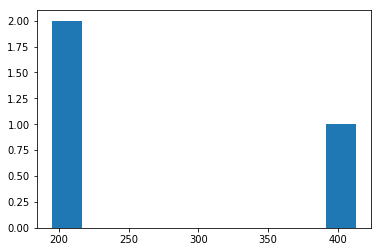

In [97]:
plt.hist(class_of_vehicle,stacked = True)

### Check for any missing values in the data 

In [98]:
vehicle.any().isnull()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [99]:
vehicle_unsupervised = vehicle.drop('class',axis=1)

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [100]:
vehicle_scaled = vehicle_unsupervised.apply(stats.zscore)

### K - Means Clustering

### Assign a dummy array called Cluster_error

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [101]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_error=[]
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, init = 'k-means++') #5 centroid
  clusters.fit(vehicle_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_error.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_error": cluster_error} )
clusters_df[0:15]


,num_clusters,cluster_error
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.480402
4,5,5189.643504
5,6,4707.817362
6,7,4349.367587
7,8,4085.200722
8,9,3846.385537


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

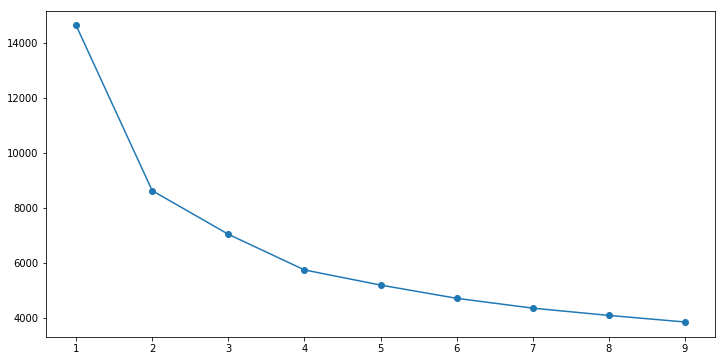

In [102]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_error, marker = "o" )

### Find out the optimal value of K

In [103]:
print('From the above graph, it seems that the optimal value of k: ',4)

From the above graph, it seems that the optimal value of k:  4


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [104]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(vehicle_scaled)
labels = kmeans.predict(vehicle_scaled)
centroids = kmeans.cluster_centers_
print("Centroid values")

print("sklearn")

print(centroids)

Centroid values
sklearn
[[-2.25338256e-01 -5.74342724e-01 -3.07614353e-01 -3.81865644e-02
   1.81774089e-01 -1.72461386e-01 -4.55562374e-01  3.20123317e-01
  -4.83943612e-01 -5.36605811e-01 -4.20567716e-01 -4.60232777e-01
  -6.03827964e-01 -6.44323227e-01 -6.09955778e-02  4.54841126e-03
   8.24841721e-01  7.07985111e-01]
 [ 1.15442786e+00  1.18428647e+00  1.21198691e+00  9.73321772e-01
   9.49213388e-02  2.18659142e-01  1.29796844e+00 -1.21424667e+00
   1.30184458e+00  1.09830595e+00  1.20590258e+00  1.30898668e+00
   1.09121291e+00 -1.07878646e-01  1.68326262e-01  2.67954844e-01
   4.67043879e-03  1.90327006e-01]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190e+00  8.69670551e+00 -5.35008001e-01  4.66247771e-01
  -5.57405972e-01  2.83410527e-01  1.69752769e+00 -5.88068272e-01
   2.12700856e-01  4.96563826e+00 -2.74839440e-01 -2.31192779e-01
  -7.07994144e-01 -4.53650721e-01]
 [-9.16832565e-01 -5.26197142e-01 -8.87660194e-01 -1.08730080e+00
  -5.63171965

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [105]:
vehicle_df = pd.DataFrame(vehicle_scaled)

Hint: Use pd.Dataframe function 

In [106]:
vehicle_df['group'] = labels

### Use kmeans.labels_ function to print out the labels of the classes

In [107]:
kmeans.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 3, 3, 0, 0, 1,
       0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 3, 2, 1, 3, 1, 3, 3, 0, 1, 3, 3, 3,
       3, 0, 3, 0, 1, 0, 1, 0, 0, 3, 1, 3, 1, 3, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 3, 0, 1, 0, 3, 3, 1, 0, 3, 0, 1, 0, 3, 0, 3, 1, 0, 1, 0, 3, 1,
       3, 3, 1, 3, 2, 0, 0, 3, 1, 1, 3, 3, 1, 0, 0, 3, 3, 3, 0, 1, 1, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 1, 0, 0, 3, 1, 2, 3, 0, 3, 0, 0, 1,
       3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 3, 0, 3, 1, 0, 0, 1, 1,
       0, 1, 3, 3, 1, 1, 0, 1, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 3, 1, 3, 3, 3, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0,
       1, 3, 3, 1, 3, 0, 1, 3, 3, 3, 0, 1, 0, 1, 3, 3, 3, 3, 1, 0, 3, 0,
       1, 3, 0, 0, 3, 1, 3, 3, 0, 0, 1, 3, 1, 3, 0, 0, 1, 0, 0, 1, 1, 3,
       0, 0, 0, 1, 3, 0, 0, 3, 3, 0, 0, 1, 0, 3, 3, 1, 0, 0, 3, 3, 1, 3,
       0, 1, 3, 0, 2, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 1,
       1, 3, 0, 1, 3, 3, 3, 0, 3, 1, 1, 3, 1, 0, 3,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [119]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [145]:
df1 = pd.DataFrame(a)
df2 = pd.DataFrame(b)
df3 = pd.DataFrame(c)

In [146]:
data_df = pd.concat([df1, df2,df3])

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

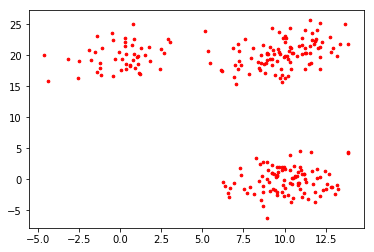

In [157]:
f1 = data_df[0].values
f2 = data_df[1].values
X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='red', s=7)

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [159]:
Z = linkage(data_df, 'ward')

In [175]:
c, coph_dists = cophenet(Z , pdist(X))
print('ward: ',c)


ward:  0.9536963071171022


### 12. Plot the dendrogram for the consolidated dataframe

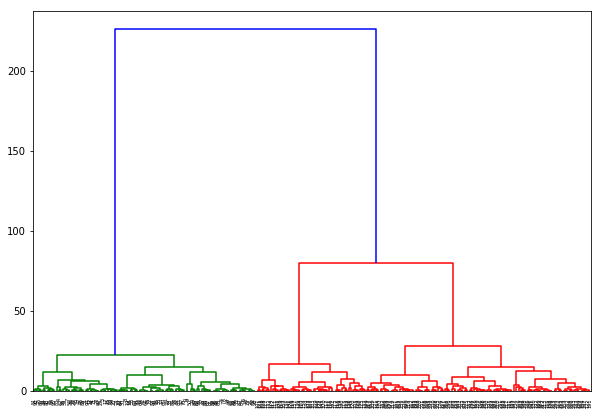

In [165]:
fig = plt.figure(figsize=(10, 7))
dn = dendrogram(Z)

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

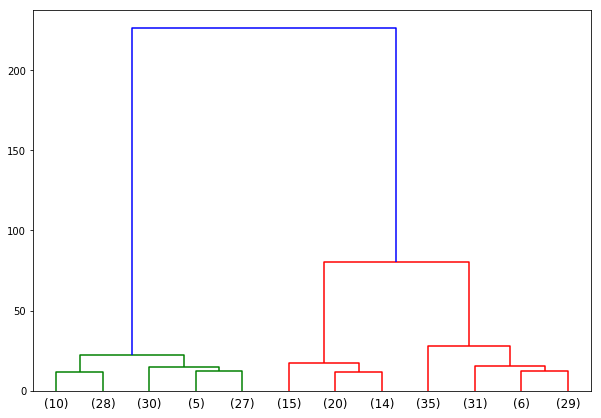

In [167]:
fig = plt.figure(figsize=(10, 7))
dn = dendrogram(Z,truncate_mode='lastp',p=12)

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [189]:
Y = cdist(data_df,data_df, 'euclidean')
Y

array([[ 0.        ,  3.87048178,  4.65340407, ..., 16.11000433,
        18.19710134, 19.76656409],
       [ 3.87048178,  0.        ,  1.38513632, ..., 19.08737757,
        20.55500011, 22.77887416],
       [ 4.65340407,  1.38513632,  0.        , ..., 18.90779341,
        20.08342343, 22.59388337],
       ...,
       [16.11000433, 19.08737757, 18.90779341, ...,  0.        ,
         4.4628717 ,  3.6917172 ],
       [18.19710134, 20.55500011, 20.08342343, ...,  4.4628717 ,
         0.        ,  5.15068293],
       [19.76656409, 22.77887416, 22.59388337, ...,  3.6917172 ,
         5.15068293,  0.        ]])

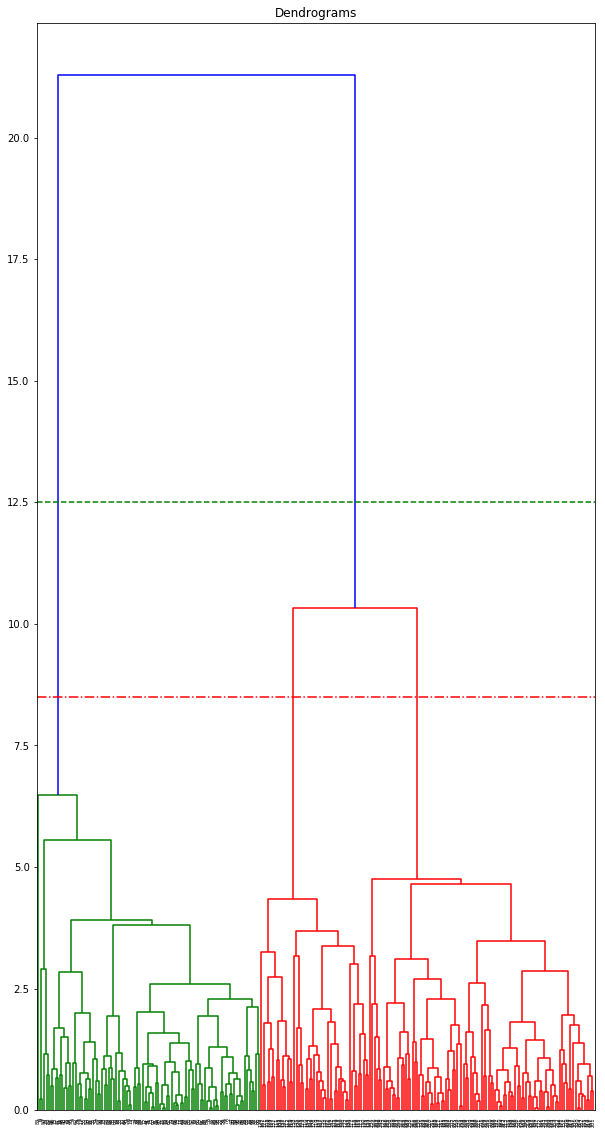

In [197]:
plt.figure(figsize=(10, 20))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_df, method='average'))
plt.axhline(y=12.5, color='g', linestyle='--')
plt.axhline(y=8.5, color='r', linestyle='-.')


In [198]:
print('From above diagram, we can say that 8.5 can be taken as the distance')

From above diagram, we can say that 8.5 can be taken as the distance


### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 